In [1]:
%matplotlib inline
import numpy as np
import xarray as xr

- *KPP_fields.nc* is generated by full GEOS-Chem. See https://github.com/JiaweiZhuang/geos-chem/tree/output_KPP
- *C_after.nc* is generated by standalone KPP, see gckpp_Main.f90 in this repo.

In [2]:
!ncdump -h KPP_fields.nc

netcdf KPP_fields {
dimensions:
	lon = 72 ;
	lat = 46 ;
	lev = 72 ;
	nspec = 240 ;
	nphy = 4 ;
	nphotol = 130 ;
	nreact = 725 ;
variables:
	double C_before(lev, lat, lon, nspec) ;
	double C_after(lev, lat, lon, nspec) ;
	double PHOTOL(lev, lat, lon, nphotol) ;
	double PHY(lev, lat, lon, nphy) ;
	double RCONST(lev, lat, lon, nreact) ;
}


In [3]:
!ncdump -h C_after.nc

netcdf C_after {
dimensions:
	lon = 72 ;
	lat = 46 ;
	lev = 72 ;
	nspec = 240 ;
variables:
	double C_after(lev, lat, lon, nspec) ;
}


In [4]:
ds = xr.open_dataset('./KPP_fields.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

In [5]:
dr = xr.open_dataarray('./C_after.nc')
dr

<xarray.DataArray 'C_after' (lev: 72, lat: 46, lon: 72, nspec: 240)>
[57231360 values with dtype=float64]
Dimensions without coordinates: lev, lat, lon, nspec

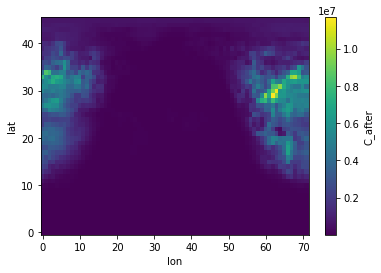

In [6]:
i_spec = 233 # OH
dr[0,...,i_spec].plot() # only did the first level

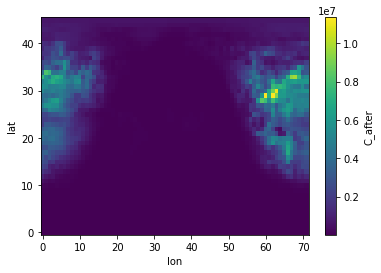

In [7]:
ds['C_after'][0,...,i_spec].plot() 

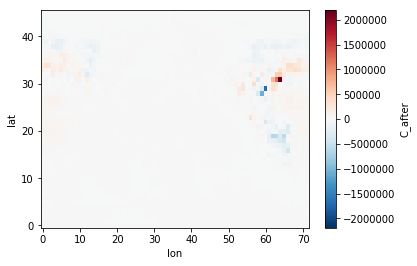

In [8]:
(dr[0,...,i_spec] - ds['C_after'][0,...,i_spec]).plot()

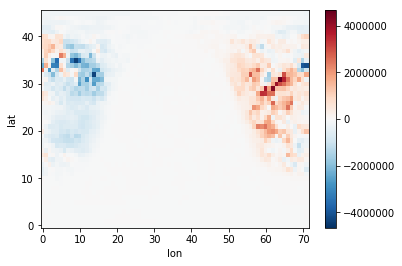

In [9]:
(dr[0,...,i_spec] - ds['C_before'][0,...,i_spec]).plot() 

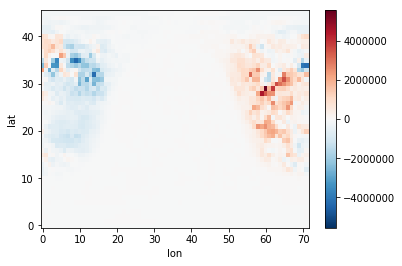

In [10]:
(ds['C_after'][0,...,i_spec] - ds['C_before'][0,...,i_spec]).plot() 